In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split


In [2]:
wine = load_wine()

In [3]:
wine.data.shape

(178, 13)

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)


In [6]:
Xtrain.shape


(124, 13)

In [7]:
Xtest.shape

(54, 13)

In [8]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.9259259259259259


### graph it

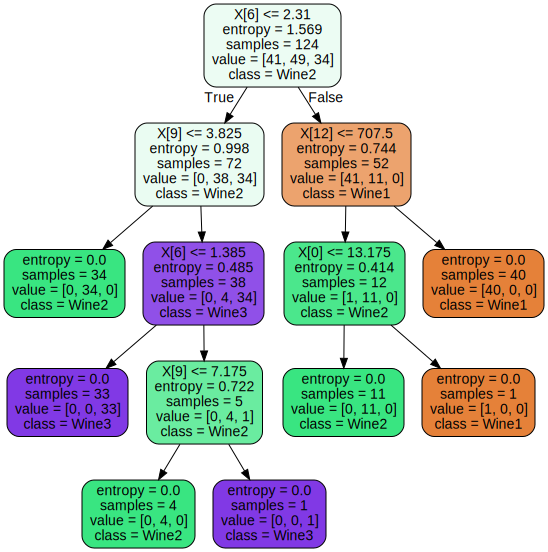

In [9]:
import graphviz
dot_data = tree.export_graphviz(clf                               
                               ,class_names=["Wine1","Wine2","Wine3"]
                               ,filled=True
                               ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

In [10]:
clf.feature_importances_

array([0.02552243, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.5080788 , 0.        , 0.        , 0.29296842,
       0.        , 0.        , 0.17343035])

##  ADJUST SETTING

In [11]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                 ,random_state=30                                  
                                 ,splitter="random"
                                 ,max_depth=5
                                 ,min_samples_leaf = 10
                                 ,min_samples_split = 10
                                 )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.8888888888888888

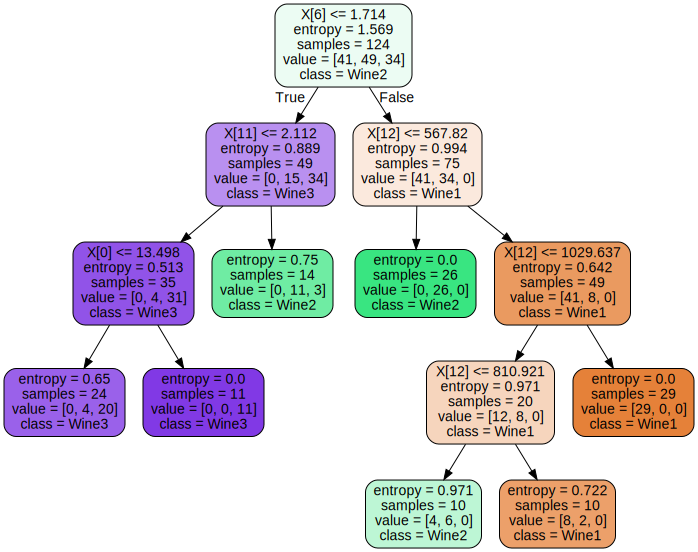

In [12]:
dot_data = tree.export_graphviz(clf                               
                               ,class_names=["Wine1","Wine2","Wine3"]
                               ,filled=True
                               ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

## dcide best parameters

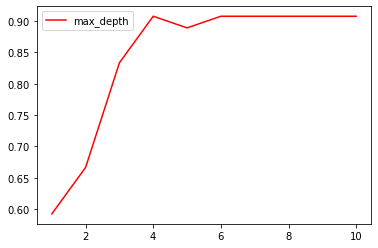

In [13]:
import matplotlib.pyplot as plt
test = []
for i in range(1,11):
    clf = tree.DecisionTreeClassifier(max_depth=i
                                     ,criterion="entropy"
                                     ,random_state=30
                                     ,splitter="random"
                                     )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()

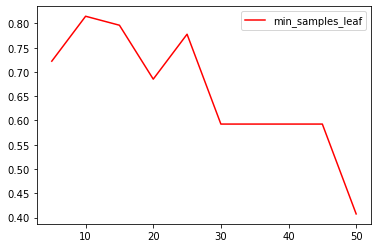

In [14]:
test = []
for i in range(1,11):
    clf = tree.DecisionTreeClassifier(max_depth=3
                                     ,criterion="entropy"
                                     ,random_state=30
                                     ,splitter="random"
                                      ,min_samples_leaf = i * 5
                                     )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(5,55, 5),test,color="red",label="min_samples_leaf")
plt.legend()